In [1]:
import networkx 
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

!pip install plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

from IPython.display import Image
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [2]:
rounds  = 1000
N = 1000     #total population
p = .01      #probability that 2 nodes (people) are connected
gamma = .03  #probability that someone comes in contact with one of their connections
beta = .03   #probability of infection if in contact

#generate G(n,p)
G = networkx.binomial_graph(N, p)
adj_matrix = networkx.linalg.graphmatrix.adjacency_matrix(G).todense()
print(adj_matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [3]:
def simulator(rounds, N, gamma, beta, adj_matrix):
    infected = np.zeros((N,),dtype=int) # Array of Healthy people
    infected[1]=1 # 1st person in the Array of healthy people gets infected
    total_infected = np.zeros(rounds) # Array to monitor the total number of infected people in each round
    sick = 1
    healthy= N - sick
    for i in range(rounds):
        infected_index_list = np.nonzero(infected)[0]   #To find the index of the people who are infected
        for index in infected_index_list:    #To Check if the peorson who is infected is still infectious at each round 
            prob_array = np.asarray(adj_matrix[index]) * np.random.rand(N) #get row in adj matrix of infected person and assign rand nums to their connections
            new_infected_indices = np.where((prob_array <= (beta*gamma)) & (prob_array != 0))[1] #find indices that match these conditions, they become infected
            for j in new_infected_indices:
                if(infected[j]==0):                    # if the person is healthy and his prob<=infectionrate infect the person
                    infected[j] = 1
                    sick = sick+1
                    healthy=healthy-1
        #print("number of infected people in round ",i,"is ",sick)
        total_infected[i]= np.sum(infected)    
    return total_infected

### Simulation for gmama = 0.03 and beta =0.03

In [4]:
infected = simulator(rounds, N, gamma, beta, adj_matrix)

#### Creating pandas dataframe to add the simulated results of infected perople count, beta and gamma

In [5]:
df_infected = pd.DataFrame(data=infected)
df_infected = df_infected.rename(columns={0:'infected'})
df_infected = df_infected.reset_index()
df_infected = df_infected.rename(columns={'index':'rounds'})
df_infected['gamma'] = gamma
df_infected['beta'] = beta
df_infected

,rounds,infected,gamma,beta
0,0,1.0,0.03,0.03
1,1,1.0,0.03,0.03
2,2,1.0,0.03,0.03
3,3,1.0,0.03,0.03
4,4,1.0,0.03,0.03
...,...,...,...,...
995,995,768.0,0.03,0.03
996,996,769.0,0.03,0.03
997,997,771.0,0.03,0.03
998,998,772.0,0.03,0.03


### Simulation of the infection rate with different values of beta and gamma

In [6]:
for i in range(6):
    gamma = gamma+0.005
    gamma = round(gamma,3)
    beta = beta + 0.007
    beta = round(beta,3)
    infected = simulator(rounds, N, gamma, beta, adj_matrix)
    df_infected_new = pd.DataFrame(data=infected)
    df_infected_new = df_infected_new.rename(columns={0:'infected'})
    df_infected_new = df_infected_new.reset_index()
    df_infected_new = df_infected_new.rename(columns={'index':'rounds'})
    df_infected_new['gamma'] = gamma
    df_infected_new['beta'] = beta
    df_infected = df_infected.append(df_infected_new)

In [7]:
df_infected['gamma_beta'] = "gamma:"+df_infected['gamma'].astype(str)+" beta:"+df_infected['beta'].astype(str)
df_infected

,rounds,infected,gamma,beta,gamma_beta
0,0,1.0,0.03,0.030,gamma:0.03 beta:0.03
1,1,1.0,0.03,0.030,gamma:0.03 beta:0.03
2,2,1.0,0.03,0.030,gamma:0.03 beta:0.03
3,3,1.0,0.03,0.030,gamma:0.03 beta:0.03
4,4,1.0,0.03,0.030,gamma:0.03 beta:0.03
...,...,...,...,...,...
995,995,1000.0,0.06,0.072,gamma:0.06 beta:0.072
996,996,1000.0,0.06,0.072,gamma:0.06 beta:0.072
997,997,1000.0,0.06,0.072,gamma:0.06 beta:0.072
998,998,1000.0,0.06,0.072,gamma:0.06 beta:0.072


### Graph of the infection spread with different values of gamma and beta

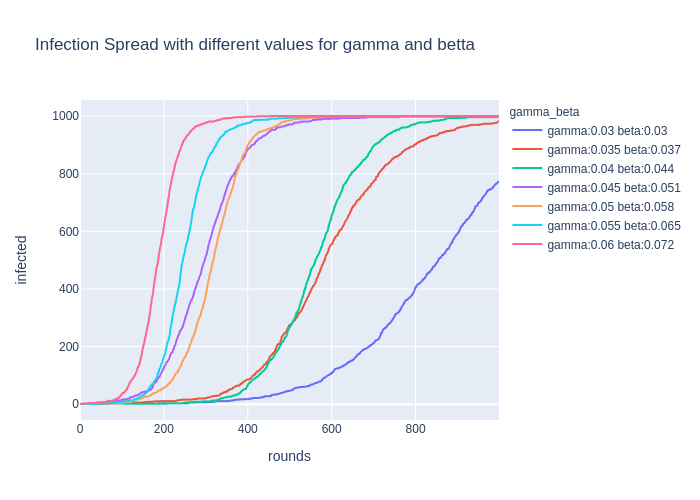

In [9]:
fig = px.line(df_infected, x="rounds", y="infected",color="gamma_beta",title="Infection Spread with different values for gamma and betta")
fig.write_image("../images/infectionSpreadWithBetaGamma.png")
Image(filename="../images/infectionSpreadWithBetaGamma.png")
#fig.show()